## Bio-Signal Analysis for Smoking


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data

df = pd.read_csv('smoking.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
# Removing unnecessary columns

df = df.drop(columns = ['ID', 'oral'])
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [4]:
df.shape

(55692, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [6]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

### Data Visualization

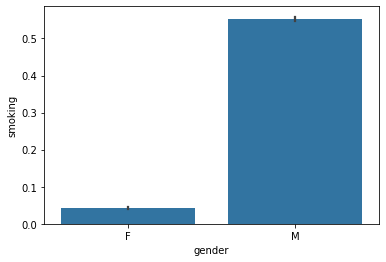

In [8]:
sns.barplot(x=df['gender'], y=df['smoking'])
plt.show()

From Above graph We can clearly see that most smokers are men.

<Axes: xlabel='gender', ylabel='count'>

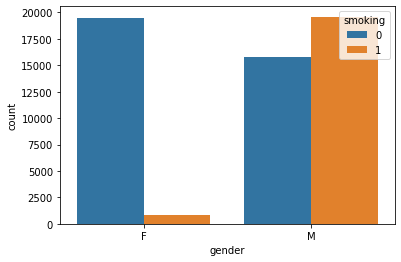

In [9]:
sns.countplot(df, x='gender', hue='smoking')

<Axes: ylabel='count'>

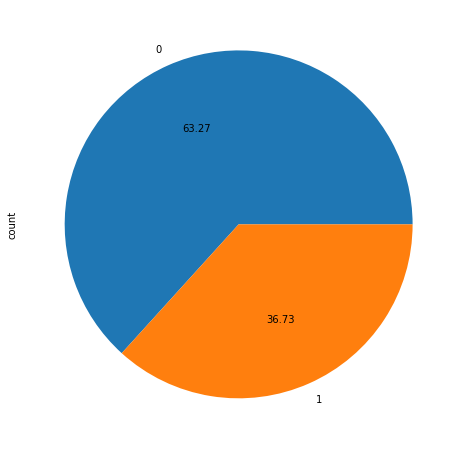

In [10]:
plt.figure(figsize=(12,8))
df['smoking'].value_counts().plot.pie(autopct = '%0.2f')

There are 36.73 percent of the people who are smoking ciggarette.

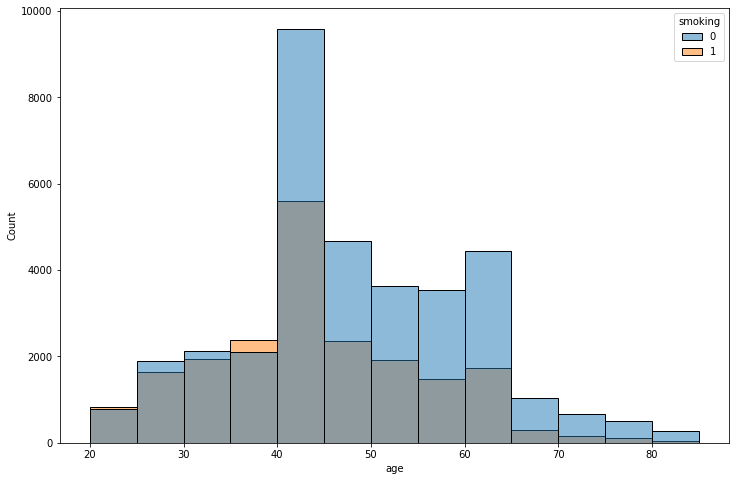

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(data= df, x='age', hue='smoking', binwidth=5)
plt.show()

Most number of smokers are having the age 40

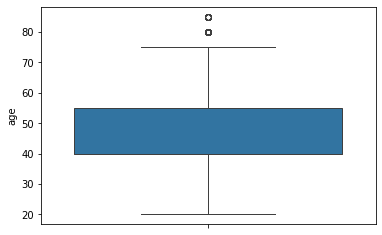

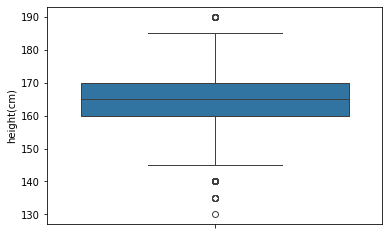

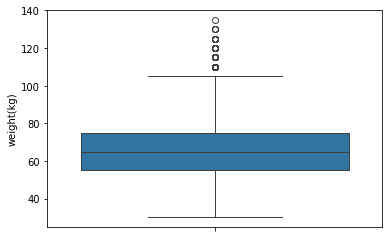

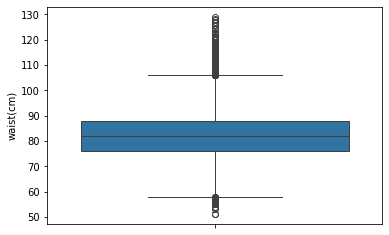

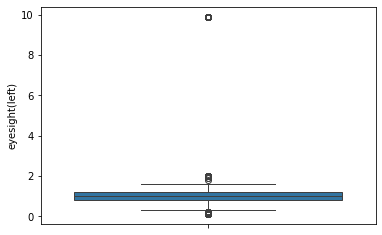

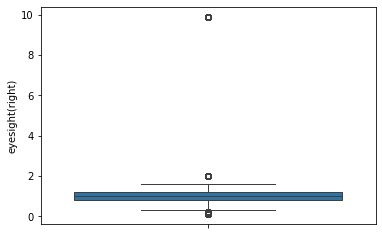

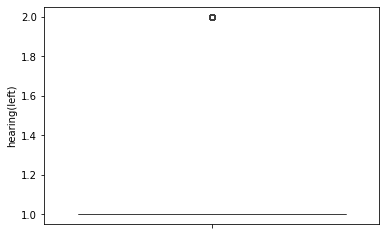

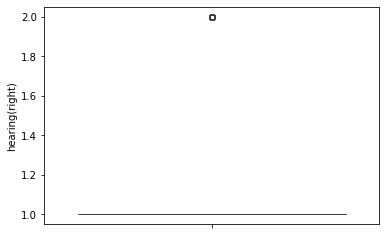

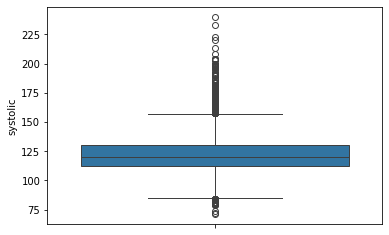

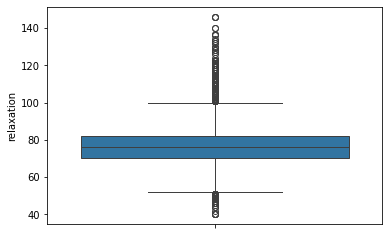

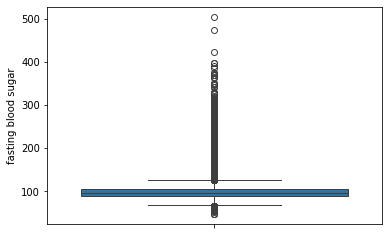

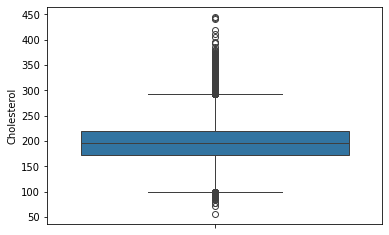

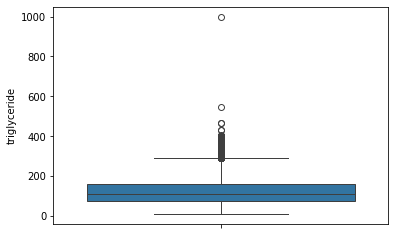

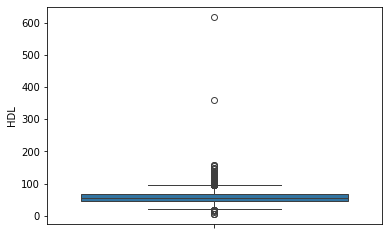

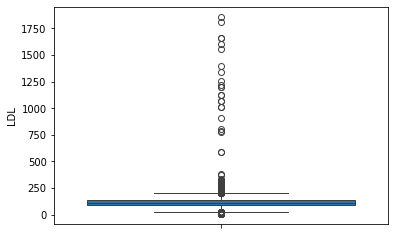

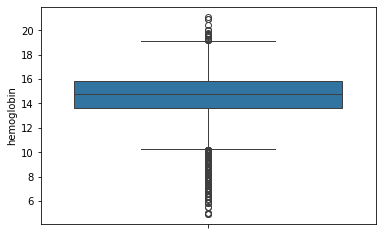

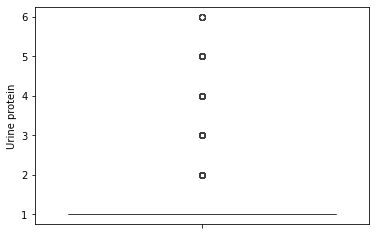

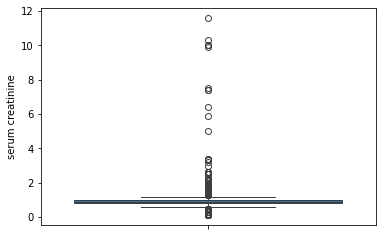

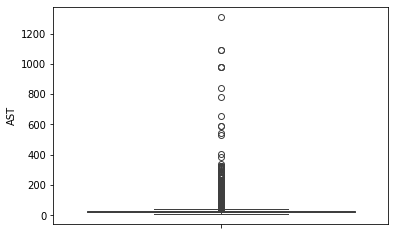

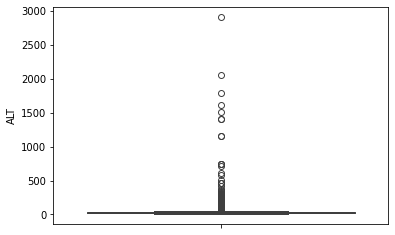

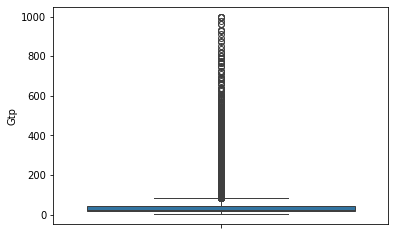

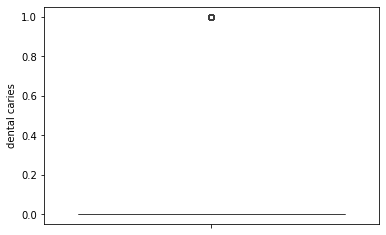

In [12]:
import warnings

warnings.filterwarnings('ignore')

for i in df.columns:
    if((df[i].dtypes == 'int64' or df[i].dtypes == 'float64') & (i != 'smoking')):
        sns.boxplot(df[i])
        plt.show()

Here outliers represent natural variations in the population, and they should be left as is in the dataset. 
These are called true outliers. Therefore for this dataset we will not remove outliers.


#### One Hot Encoding for categorical features of a dataframe.

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])

### Feature selection using feature importance

In [14]:
X = df.iloc[:, :-1]
y = df['smoking']

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [16]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

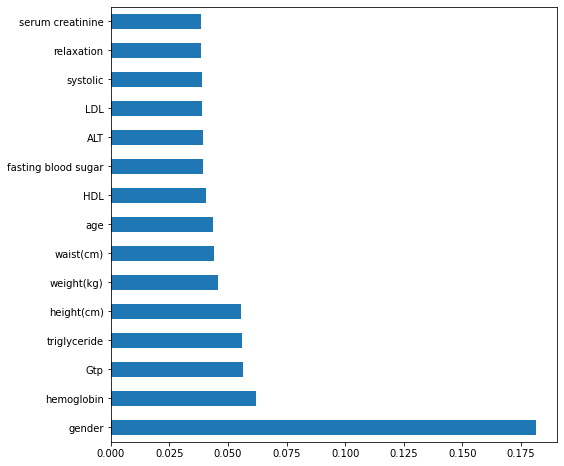

In [17]:
df1 = pd.Series(model.feature_importances_, index = X.columns)
plt.figure(figsize =(8,8))
df1.nlargest(15).plot(kind = "barh")
plt.show()

Feature importance is a technique that calculate a score for all the input features for a given model. 
So out of 24 features we will select the top 15 features based on the score.

In [18]:
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

### Logistic Regression

In [19]:
X = df [['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'ALT', 'Gtp']]
y = df['smoking']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc=StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred_lr = lr.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Model accuracy score: ' ,acc_lr)

Logistic Regression Model accuracy score:  0.7305862285662986


In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      7027
           1       0.62      0.69      0.65      4112

    accuracy                           0.73     11139
   macro avg       0.71      0.72      0.72     11139
weighted avg       0.74      0.73      0.73     11139



In [32]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

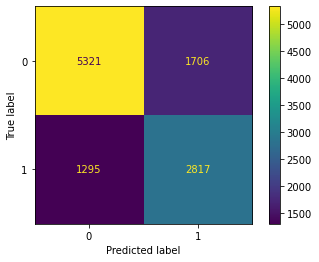

In [33]:
cm = confusion_matrix(y_test, y_pred_lr , labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()

plt.show()

The accuracy of the logistic regression model is -- > 73 %

### Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
sv = SVC()

In [36]:
sv.fit(X_train, y_train)

SVC()

In [37]:
y_pred_sv = sv.predict(X_test)

In [38]:
acc_sv = accuracy_score(y_test, y_pred_sv)
print('SVM Model accuracy score: ' ,acc_sv)

SVM Model accuracy score:  0.7527605709668731


In [39]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      7027
           1       0.65      0.72      0.68      4112

    accuracy                           0.75     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.75      0.76     11139



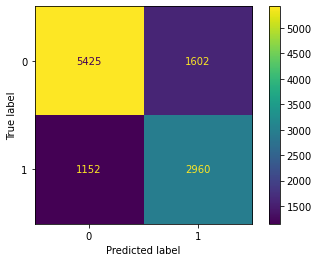

In [40]:
cm = confusion_matrix(y_test, y_pred_sv , labels=sv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sv.classes_)

disp.plot()

plt.show()

The accuracy of the SVM model is -- > 75 %

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()

In [43]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
y_pred_dt = dt.predict(X_test)

In [45]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Model accuracy score: ' ,acc_dt)

Decision Tree Model accuracy score:  0.789298859861747


In [46]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      7027
           1       0.72      0.71      0.71      4112

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139



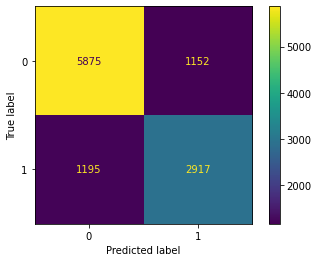

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt , labels=dt.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()

plt.show()

The accuracy of the Decision Tree model is -- > 79 %

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier()

In [50]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_pred_rfc = rfc.predict(X_test)

In [52]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Model accuracy score: ' ,acc_rfc)

Random Forest Model accuracy score:  0.8242212047760122


In [53]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7027
           1       0.75      0.78      0.77      4112

    accuracy                           0.82     11139
   macro avg       0.81      0.82      0.81     11139
weighted avg       0.83      0.82      0.82     11139



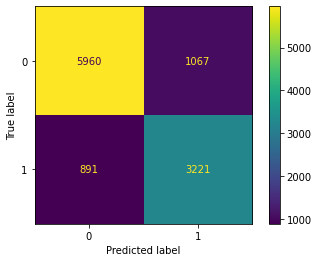

In [54]:
cm = confusion_matrix(y_test, y_pred_rfc , labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

disp.plot()

plt.show()

The accuracy of the Random Forest model is -- > 82 %

### XGBoosting

In [55]:
from xgboost import XGBClassifier

In [56]:
xgbc = XGBClassifier()

In [57]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgbc = xgbc.predict(X_test)

In [59]:
acc_xgbc = accuracy_score(y_test, y_pred_xgbc)
print('XGB Classifier accuracy score: ' ,acc_xgbc)

XGB Classifier accuracy score:  0.7685609121106024


In [78]:
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7027
           1       0.68      0.71      0.69      4112

    accuracy                           0.77     11139
   macro avg       0.75      0.76      0.75     11139
weighted avg       0.77      0.77      0.77     11139



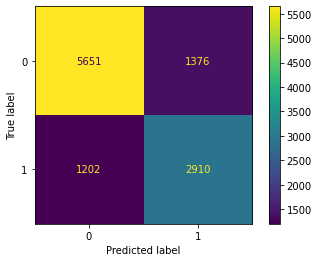

In [79]:
cm = confusion_matrix(y_test, y_pred_xgbc , labels=xgbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgbc.classes_)

disp.plot()

plt.show()

The accuracy of the XGBoosting model is -- > 77 %

### HyperParameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [62]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [63]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               cv = 5, n_jobs = -1)

In [64]:
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 64, 118, 173, 227,
                                                         282, 336, 391, 445,
                                                         500]})

In [65]:
rf_random.best_params_

{'n_estimators': 445,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [68]:
rfc= RandomForestClassifier(n_estimators = 445, 
                             min_samples_split = 5, 
                             min_samples_leaf= 1, 
                             max_features = 'sqrt', 
                             max_depth= 80, 
                             bootstrap=False)

In [69]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='sqrt',
                       min_samples_split=5, n_estimators=445)

In [70]:
y_pred_rfc= rfc.predict(X_test)

In [71]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
print('Random Forest Model with hyperparameters accuracy score: ' ,acc_rfc)

Random Forest Model with hyperparameters accuracy score:  0.8274530927372296


In [72]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7027
           1       0.75      0.79      0.77      4112

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



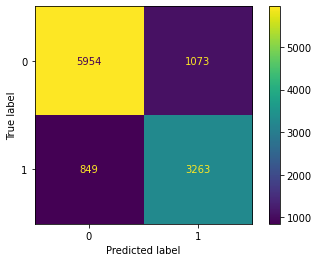

In [77]:
cm = confusion_matrix(y_test, y_pred_rfc , labels=rfc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

disp.plot()

plt.show()

In [76]:
models = ['Logistic Regresson','SVM','Decision Tree', 'XGB', 'Random Forest']
Acc_Score = [acc_lr, acc_sv, acc_dt, acc_xgbc, acc_rfc ]
Acc_Score1 = [f'{i*100: .2f}%' for i in Acc_Score]

models_score = pd.DataFrame({
    'Model' : models,
    'Accuracy_Score' : Acc_Score1
})

models_score

,Model,Accuracy_Score
0,Logistic Regresson,73.06%
1,SVM,75.28%
2,Decision Tree,78.93%
3,XGB,76.86%
4,Random Forest,82.75%
